# **Team Performance and Rivalry Analysis:**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore") # Ignore warnings
import re

In [74]:
from data_analysis_pipeline import data_engineering

data= data_engineering()
data.shape

(7002, 19)

In [75]:
# Squeeze year= 0 to some hypothetical value say 1850 for better plotting experience
# Here, year=0 means before 1877. Otherwise a huge gap between 0 and 1877 makes x-axis hectic
#yearly_counts.loc[yearly_counts['year'] == 0, 'year'] = 1850

# Using repalce replace 0 by 1850 inplace= True:
data["year"].replace(0, 1850, inplace=True)

In [76]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [77]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [78]:
data.dtypes

team_1                       object
team_2                       object
winner                       object
margin                       object
ground                       object
format                       object
test_score                    int64
odi_score                     int64
t20i_score                    int64
start_date           datetime64[ns]
year_month                   object
match_duration                int64
year                          int64
month                        object
ground_country               object
is_neutral_ground              bool
won_by_wickets              float64
won_by_runs                 float64
won_by_inns                    bool
dtype: object

## 7. **Most Successful Teams:**

Analyze the most successful cricket teams based on their win records to identify historical dominance patterns.

**1. Count wins by team and calculate basic statistics:** 

First, count the number of wins for each team and calculate their win percentages to identify the most successful teams:

In [79]:
# Count wins by team and calculate basic statistics

# Count the number of wins for each team
team_wins = data['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']
team_wins

,Team,Wins
0,Australia,1121
1,England,888
2,India,881
3,Pakistan,777
4,South Africa,683
5,West Indies,674
6,New Zealand,597
7,Sri Lanka,595
8,Bangladesh,220
9,no result,183


In [80]:
# Calculate the total number of matches
total_matches = len(data)
total_matches

7002

In [81]:
# Calculate win percentage relative to total matches
team_wins['Win_Percentage'] = (team_wins['Wins'] / total_matches * 100).round(1)
team_wins

,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


In [82]:
# Display the top teams by win count:
print("Top Cricket Teams by Number of Wins:")
team_wins.head(10)

Top Cricket Teams by Number of Wins:


,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


In [83]:
# Calculate some basic statistics for context:
total_teams = len(team_wins)
top5_wins_percentage = team_wins.head(5)['Wins'].sum() / total_matches * 100

print(f"\nTotal number of teams with at least one win: {total_teams}")
print(f"Top 5 teams account for {top5_wins_percentage:.1f}% of all wins")


Total number of teams with at least one win: 15
Top 5 teams account for 62.1% of all wins


2. **Create a bar chart of the most successful teams:**

Now, let's visualize the win counts of the top teams using a bar chart to clearly show the hierarchy of successful teams.

In [84]:
# Get the top 15 teams by win count
top_teams = team_wins.head(15).copy()
top_teams

,Team,Wins,Win_Percentage
0,Australia,1121,16.0
1,England,888,12.7
2,India,881,12.6
3,Pakistan,777,11.1
4,South Africa,683,9.8
5,West Indies,674,9.6
6,New Zealand,597,8.5
7,Sri Lanka,595,8.5
8,Bangladesh,220,3.1
9,no result,183,2.6


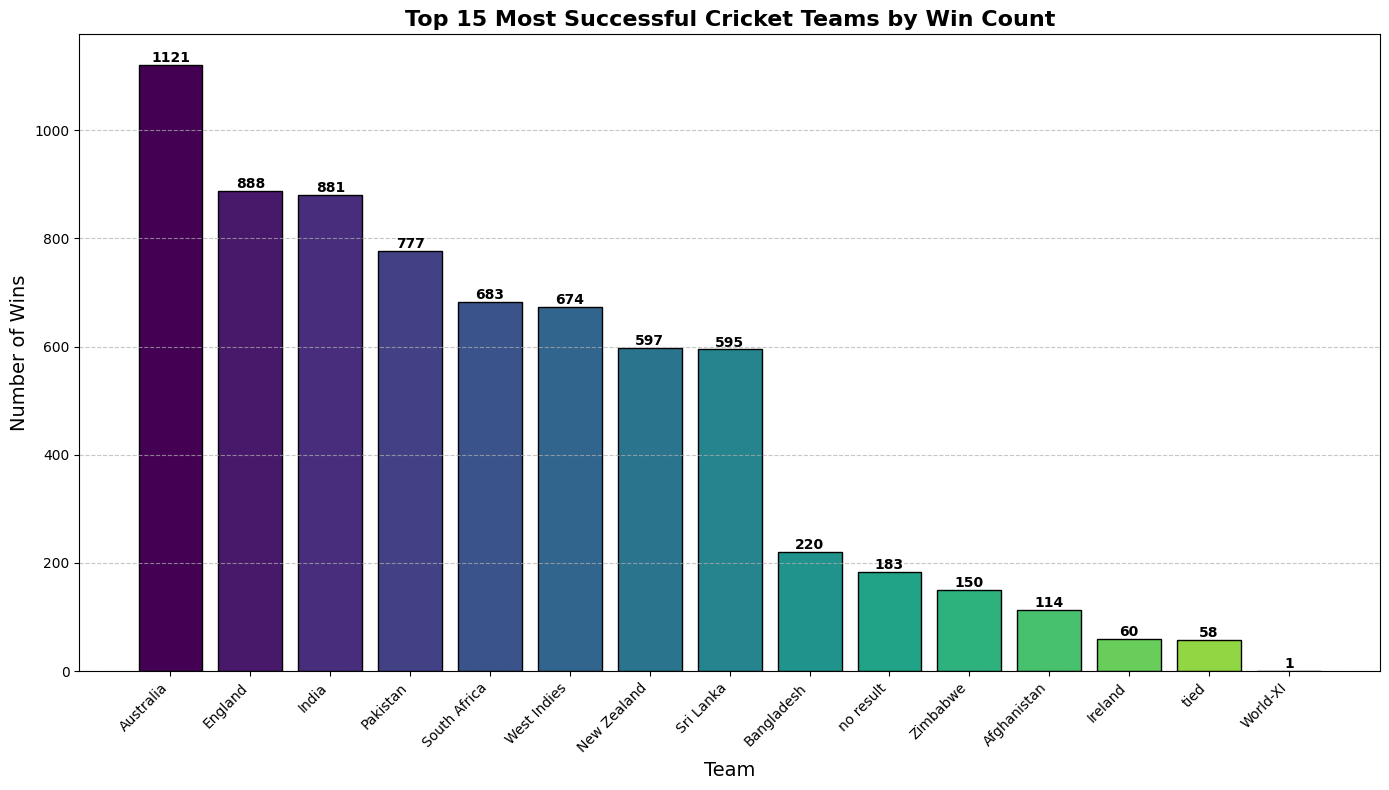

In [85]:
# Create a figure:
plt.figure(figsize=(14, 8))

# Create a bar chart with custom colors
bars = plt.bar(
    top_teams['Team'], 
    top_teams['Wins'], 
    color=plt.cm.viridis(np.linspace(0, 0.9, len(top_teams))),  # Color gradient
    edgecolor='black',
    linewidth=1
)

# Add win count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}',ha='center', fontweight='bold')

# Add chart title and labels
plt.title('Top 15 Most Successful Cricket Teams by Win Count', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**3.  Analyze win percentages by format:**

Now, examine how teams perform across different formats to identify format specialists and all-format dominant teams.

In [86]:
# Group data by winner and format, then count wins
format_wins = data.groupby(['winner', 'format']).size().reset_index(name='Format_Wins')
format_wins

,winner,format,Format_Wins
0,Afghanistan,ODI,58
1,Afghanistan,T20I,52
2,Afghanistan,Test,4
3,Australia,ODI,597
4,Australia,T20I,105
5,Australia,Test,419
6,Bangladesh,ODI,142
7,Bangladesh,T20I,56
8,Bangladesh,Test,22
9,England,ODI,386


In [87]:
# Get total matches by format
format_totals = data.groupby('format').size().reset_index(name='Total_Format_Matches')
format_totals

,format,Total_Format_Matches
0,ODI,4130
1,T20I,1082
2,Test,1790


In [88]:
# Merge the data
format_analysis = pd.merge(format_wins, format_totals, on='format')
format_analysis

,winner,format,Format_Wins,Total_Format_Matches
0,Afghanistan,ODI,58,4130
1,Afghanistan,T20I,52,1082
2,Afghanistan,Test,4,1790
3,Australia,ODI,597,4130
4,Australia,T20I,105,1082
5,Australia,Test,419,1790
6,Bangladesh,ODI,142,4130
7,Bangladesh,T20I,56,1082
8,Bangladesh,Test,22,1790
9,England,ODI,386,4130


In [89]:
# Calculate win percentage by format
format_analysis['Win_Percentage'] = (format_analysis['Format_Wins'] / format_analysis['Total_Format_Matches'] * 100).round(1)
format_analysis

,winner,format,Format_Wins,Total_Format_Matches,Win_Percentage
0,Afghanistan,ODI,58,4130,1.4
1,Afghanistan,T20I,52,1082,4.8
2,Afghanistan,Test,4,1790,0.2
3,Australia,ODI,597,4130,14.5
4,Australia,T20I,105,1082,9.7
5,Australia,Test,419,1790,23.4
6,Bangladesh,ODI,142,4130,3.4
7,Bangladesh,T20I,56,1082,5.2
8,Bangladesh,Test,22,1790,1.2
9,England,ODI,386,4130,9.3


In [90]:
# Get the top 10 teams overall
top10_teams = team_wins.head(10)['Team'].tolist()
top10_teams

['Australia',
 'England',
 'India',
 'Pakistan',
 'South Africa',
 'West Indies',
 'New Zealand',
 'Sri Lanka',
 'Bangladesh',
 'no result']

In [91]:
# Filter for top 10 teams
top_teams_format = format_analysis[format_analysis['winner'].isin(top10_teams)]
top_teams_format

,winner,format,Format_Wins,Total_Format_Matches,Win_Percentage
3,Australia,ODI,597,4130,14.5
4,Australia,T20I,105,1082,9.7
5,Australia,Test,419,1790,23.4
6,Bangladesh,ODI,142,4130,3.4
7,Bangladesh,T20I,56,1082,5.2
8,Bangladesh,Test,22,1790,1.2
9,England,ODI,386,4130,9.3
10,England,T20I,102,1082,9.4
11,England,Test,400,1790,22.3
12,India,ODI,543,4130,13.1


In [92]:
# Create a pivot table for easier visualization
format_pivot = top_teams_format.pivot(index='winner', columns='format', values='Win_Percentage')
format_pivot

format,ODI,T20I,Test
winner,,,
Australia,14.5,9.7,23.4
Bangladesh,3.4,5.2,1.2
England,9.3,9.4,22.3
India,13.1,14.5,10.1
New Zealand,9.0,9.7,6.6
Pakistan,12.0,12.2,8.4
South Africa,9.6,9.5,10.3
Sri Lanka,9.9,7.5,5.9
West Indies,9.7,8.3,10.3


In [93]:
# Fill NaN values with 0 (teams that haven't won in a particular format)
format_pivot = format_pivot.fillna(0)
format_pivot

format,ODI,T20I,Test
winner,,,
Australia,14.5,9.7,23.4
Bangladesh,3.4,5.2,1.2
England,9.3,9.4,22.3
India,13.1,14.5,10.1
New Zealand,9.0,9.7,6.6
Pakistan,12.0,12.2,8.4
South Africa,9.6,9.5,10.3
Sri Lanka,9.9,7.5,5.9
West Indies,9.7,8.3,10.3


In [94]:
# Display the format-specific win percentages
print("\nWin Percentages by Format for Top 10 Teams:")
print(format_pivot)


Win Percentages by Format for Top 10 Teams:
format        ODI   T20I   Test 
winner                          
Australia     14.5    9.7   23.4
Bangladesh     3.4    5.2    1.2
England        9.3    9.4   22.3
India         13.1   14.5   10.1
New Zealand    9.0    9.7    6.6
Pakistan      12.0   12.2    8.4
South Africa   9.6    9.5   10.3
Sri Lanka      9.9    7.5    5.9
West Indies    9.7    8.3   10.3
no result      3.7    2.8    0.0


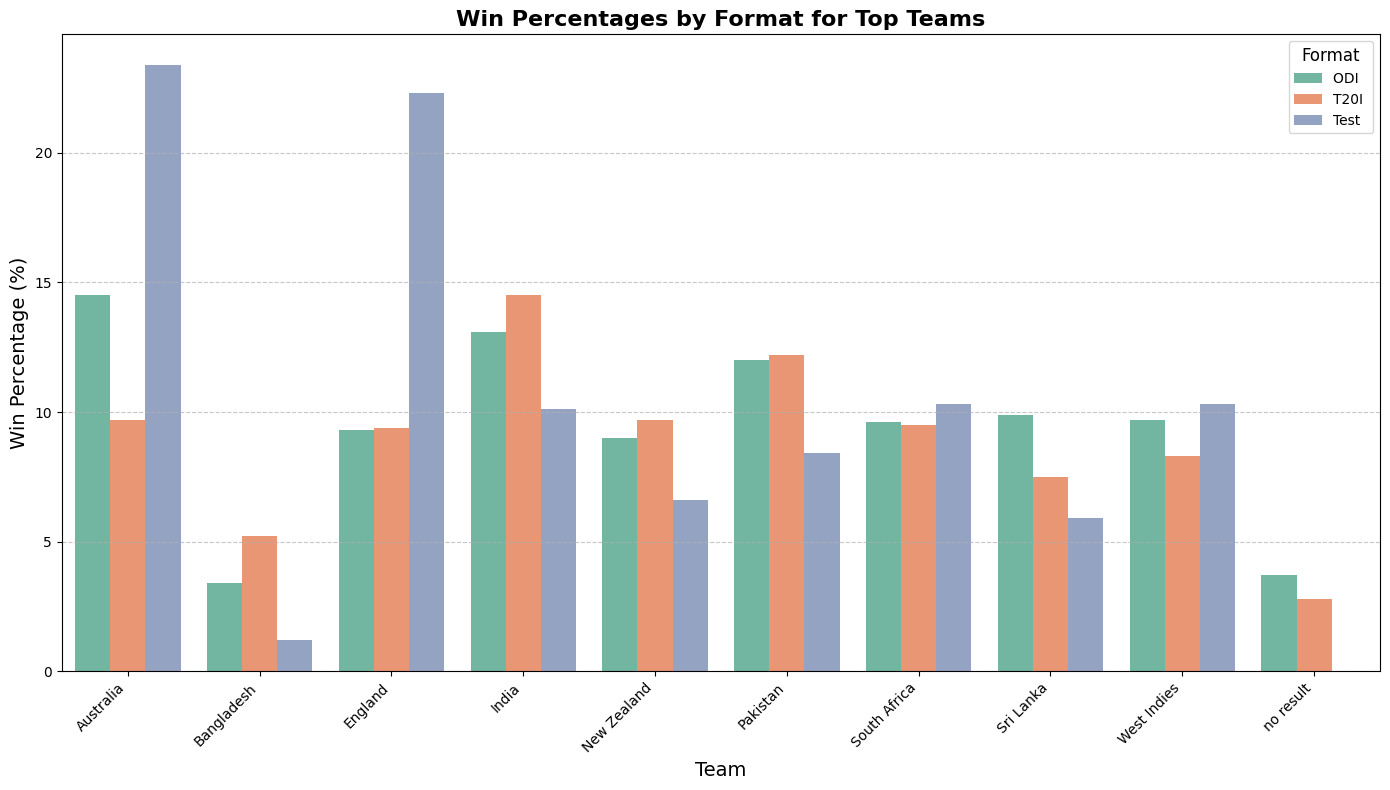

In [95]:
# Create a grouped bar chart to compare format performance
plt.figure(figsize=(14, 8))

# Get the data in the right format for plotting
plot_data = top_teams_format.copy()

# Create the grouped bar chart using Seaborn
sns.barplot(
    x='winner', 
    y='Win_Percentage', 
    hue='format',
    data=plot_data,
    palette='Set2'
)

# Add chart title and labels
plt.title('Win Percentages by Format for Top Teams', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Format', title_fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**4. Analyze team performance over time:**

Now, examine how team dominance has evolved over time to identify rising stars and declining powers.

In [96]:
# Group data by winner and year, then count wins
yearly_wins = data.groupby(['winner', 'year']).size().reset_index(name='Year_Wins')
yearly_wins

,winner,year,Year_Wins
0,Afghanistan,2010,2
1,Afghanistan,2014,3
2,Afghanistan,2015,8
3,Afghanistan,2016,8
4,Afghanistan,2017,13
...,...,...,...
745,tied,2019,3
746,tied,2020,4
747,tied,2022,2
748,tied,2023,1


In [97]:
# Get total matches by year
yearly_totals = data.groupby('year').size().reset_index(name='Year_Total')
yearly_totals

,year,Year_Total
0,1850,29
1,1877,2
2,1879,1
3,1880,1
4,1882,3
...,...,...
130,2021,192
131,2022,241
132,2023,227
133,2024,219


In [98]:
# Merge the data
yearly_analysis = pd.merge(yearly_wins, yearly_totals, on='year')
yearly_analysis

,winner,year,Year_Wins,Year_Total
0,Afghanistan,2010,2,197
1,Afghanistan,2014,3,182
2,Afghanistan,2015,8,192
3,Afghanistan,2016,8,195
4,Afghanistan,2017,13,203
...,...,...,...,...
745,tied,2019,3,213
746,tied,2020,4,100
747,tied,2022,2,241
748,tied,2023,1,227


In [99]:
# Calculate win percentage by year
yearly_analysis['Win_Percentage'] = (yearly_analysis['Year_Wins'] / yearly_analysis['Year_Total'] * 100).round(1)
yearly_analysis

,winner,year,Year_Wins,Year_Total,Win_Percentage
0,Afghanistan,2010,2,197,1.0
1,Afghanistan,2014,3,182,1.6
2,Afghanistan,2015,8,192,4.2
3,Afghanistan,2016,8,195,4.1
4,Afghanistan,2017,13,203,6.4
...,...,...,...,...,...
745,tied,2019,3,213,1.4
746,tied,2020,4,100,4.0
747,tied,2022,2,241,0.8
748,tied,2023,1,227,0.4


In [100]:
# Filter for top 5 teams for clearer visualization
top5_teams = team_wins.head(5)['Team'].tolist()
print(top5_teams)
print("|"*80)
top_teams_yearly = yearly_analysis[yearly_analysis['winner'].isin(top5_teams)]
print(top_teams_yearly)

['Australia', 'England', 'India', 'Pakistan', 'South Africa']
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
           winner  year  Year_Wins  Year_Total  Win_Percentage
13      Australia  1850         16          29            55.2
14      Australia  1877          1           2            50.0
15      Australia  1879          1           1           100.0
16      Australia  1882          3           3           100.0
17      Australia  1883          1           3            33.3
..            ...   ...        ...         ...             ...
520  South Africa  2021         21         192            10.9
521  South Africa  2022         21         241             8.7
522  South Africa  2023         19         227             8.4
523  South Africa  2024         18         219             8.2
524  South Africa  2025          3          53             5.7

[416 rows x 5 columns]


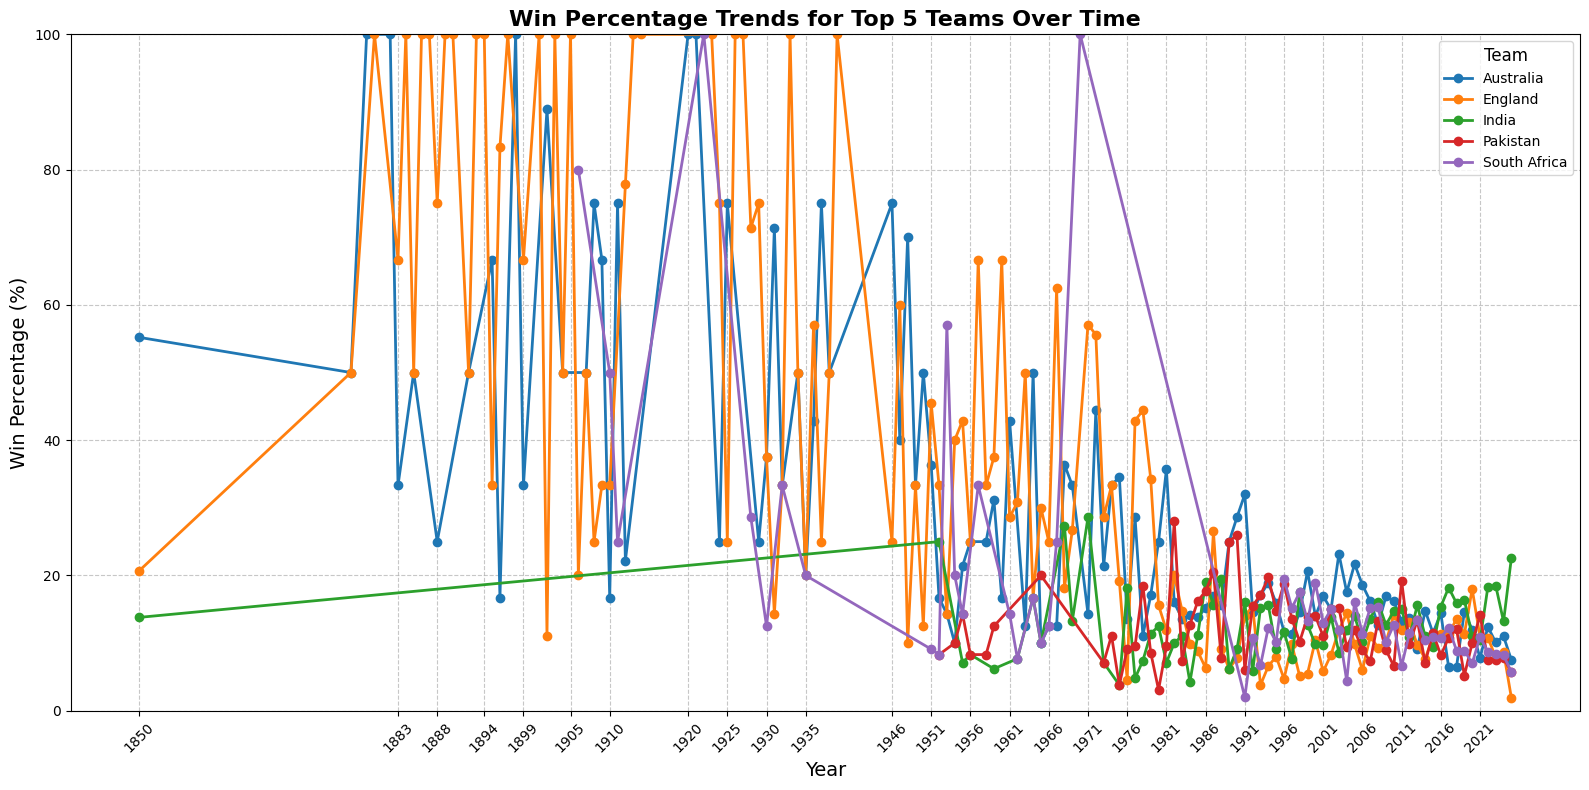

In [101]:
# Create a line chart to show performance trends over time:
plt.figure(figsize=(16, 8))

# Create the line chart
for team in top5_teams:
    team_data = top_teams_yearly[top_teams_yearly['winner'] == team]
    plt.plot(
        team_data['year'], 
        team_data['Win_Percentage'], 
        marker='o', 
        linewidth=2, 
        label=team
    )

# Add chart title and labels
plt.title('Win Percentage Trends for Top 5 Teams Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)

# Add a legend
plt.legend(title='Team', title_fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set reasonable y-axis limits
plt.ylim(0, 100)

# Show only every 5th year on x-axis to avoid crowding
years = sorted(yearly_analysis['year'].unique())
plt.xticks([y for i, y in enumerate(years) if i % 5 == 0], rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**5. Analyze home vs. away performance:** 

Let's examine how teams perform at home versus away to identify teams with strong home advantage or good traveling records.

In [102]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [103]:
data.head(10)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,2004-Apr,4,2004,Apr,Pakistan,False,9.0,0.0,False
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,2004-Mar,5,2004,Mar,Pakistan,False,0.0,52.0,False
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,1999-Feb,5,1999,Feb,India,False,0.0,46.0,False
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,1999-Feb,4,1999,Feb,India,False,0.0,212.0,False
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,1999-Jan,4,1999,Jan,India,False,0.0,12.0,False


In [119]:
# If winner and ground_country are same then it is home win:
data[data["winner"] ==data["ground_country"]]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,...,4,2004,Apr,Pakistan,False,9.0,0.0,False,True,False
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,...,4,1999,Feb,India,False,0.0,212.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,West Indies,Zimbabwe,West Indies,8 wickets,North Sound,T20I,0,0,305,2013-03-02,...,1,2013,Mar,West Indies,False,8.0,0.0,False,True,False
7788,Australia,ICC World XI,Australia,210 runs,Sydney,Test,1768,0,0,2005-10-14,...,4,2005,Oct,Australia,False,0.0,210.0,False,True,False
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,...,1,2005,Oct,Australia,False,0.0,156.0,False,True,False
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,...,1,2005,Oct,Australia,False,0.0,55.0,False,True,False


In [ ]:
# If winner country is not same as ground_country then it is away win:
data[data["winner"] != data["ground_country"]]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,...,1,1983,Jun,England,True,10.0,0.0,False,False,True
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,...,1,1983,Jun,England,True,8.0,0.0,False,False,True
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,...,1,2022,Oct,Australia,True,0.0,31.0,False,False,True
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,...,1,2010,Feb,West Indies,False,0.0,26.0,False,False,True


In [ ]:
# If we want even more detailed and conscious analysis then, we can also do something like this:

# Create a column to identify home wins:
data['is_home_win'] = (data['winner'] == data['team_1']) & (data['team_1'] == data['ground_country']) | \
                      (data['winner'] == data['team_2']) & (data['team_2'] == data['ground_country'])

# Create a column to identify away wins
data['is_away_win'] = (data['winner'] == data['team_1']) & (data['team_1'] != data['ground_country']) | \
                      (data['winner'] == data['team_2']) & (data['team_2'] != data['ground_country'])
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns',
       'is_home_win', 'is_away_win'],
      dtype='object')

In [122]:
data[data["is_away_win"] == True]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,...,1,1983,Jun,England,True,10.0,0.0,False,False,True
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,...,1,1983,Jun,England,True,8.0,0.0,False,False,True
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,...,1,2022,Oct,Australia,True,0.0,31.0,False,False,True
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,...,1,2010,Feb,West Indies,False,0.0,26.0,False,False,True


In [109]:
data.head(10)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
10,Pakistan,India,Pakistan,9 wickets,Lahore,Test,1695,0,0,2004-04-05,...,4,2004,Apr,Pakistan,False,9.0,0.0,False,True,False
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
13,India,Pakistan,India,212 runs,Delhi,Test,1443,0,0,1999-02-04,...,4,1999,Feb,India,False,0.0,212.0,False,True,False
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True


In [118]:
data[data["is_away_win"] == True]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
12,India,Pakistan,Pakistan,46 runs,Eden Gardens,Test,1444,0,0,1999-02-16,...,5,1999,Feb,India,False,0.0,46.0,False,False,True
14,India,Pakistan,Pakistan,12 runs,Chennai,Test,1442,0,0,1999-01-28,...,4,1999,Jan,India,False,0.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,West Indies,Zimbabwe,West Indies,10 wickets,Birmingham,ODI,0,220,0,1983-06-20,...,1,1983,Jun,England,True,10.0,0.0,False,False,True
7783,West Indies,Zimbabwe,West Indies,8 wickets,Worcester,ODI,0,208,0,1983-06-13,...,1,1983,Jun,England,True,8.0,0.0,False,False,True
7784,West Indies,Zimbabwe,West Indies,31 runs,Hobart,T20I,0,0,1834,2022-10-19,...,1,2022,Oct,Australia,True,0.0,31.0,False,False,True
7787,West Indies,Zimbabwe,Zimbabwe,26 runs,Port of Spain,T20I,0,0,150,2010-02-28,...,1,2010,Feb,West Indies,False,0.0,26.0,False,False,True


In [125]:
data.sample(2)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
3215,India,West Indies,India,88 runs,Lauderhill,T20I,0,0,1726,2022-08-07,...,1,2022,Aug,West Indies,False,0.0,88.0,False,False,True
4642,Sri Lanka,Australia,Australia,2 wickets,Pallekele,ODI,0,4409,0,2022-06-14,...,1,2022,Jun,Sri Lanka,False,2.0,0.0,False,False,True


In [123]:
# Group by winner and count home/away wins:
home_away_wins = data.groupby('winner').agg({'is_home_win': 'sum','is_away_win': 'sum'}).reset_index()
home_away_wins

,winner,is_home_win,is_away_win
0,Afghanistan,0,114
1,Australia,585,536
2,Bangladesh,131,89
3,England,444,444
4,India,366,515
5,Ireland,20,40
6,New Zealand,265,332
7,Pakistan,211,566
8,South Africa,289,394
9,Sri Lanka,273,322


In [ ]:
# Rename columns for clarity
home_away_wins.columns = ['Team', 'Home_Wins', 'Away_Wins']

# Calculate total wins
home_away_wins['Total_Wins'] = home_away_wins['Home_Wins'] + home_away_wins['Away_Wins']

# Calculate home win percentage
home_away_wins['Home_Win_Percentage'] = (home_away_wins['Home_Wins'] / home_away_wins['Total_Wins'] * 100).round(1)

# Filter for teams with at least 20 total wins
significant_teams = home_away_wins[home_away_wins['Total_Wins'] >= 20].copy()

# Sort by total wins
significant_teams = significant_teams.sort_values('Total_Wins', ascending=False)

# Display home vs. away performance
print("\nHome vs. Away Performance for Teams with at least 20 wins:")
print(significant_teams[['Team', 'Home_Wins', 'Away_Wins', 'Total_Wins', 'Home_Win_Percentage']].head(15))


Home vs. Away Performance for Teams with at least 20 wins:
            Team  Home_Wins  Away_Wins  Total_Wins  Home_Win_Percentage
1      Australia        585        536        1121                 52.2
3        England        444        444         888                 50.0
4          India        366        515         881                 41.5
7       Pakistan        211        566         777                 27.2
8   South Africa        289        394         683                 42.3
10   West Indies        280        394         674                 41.5
6    New Zealand        265        332         597                 44.4
9      Sri Lanka        273        322         595                 45.9
2     Bangladesh        131         89         220                 59.5
12      Zimbabwe         80         70         150                 53.3
0    Afghanistan          0        114         114                  0.0
5        Ireland         20         40          60                 33.3


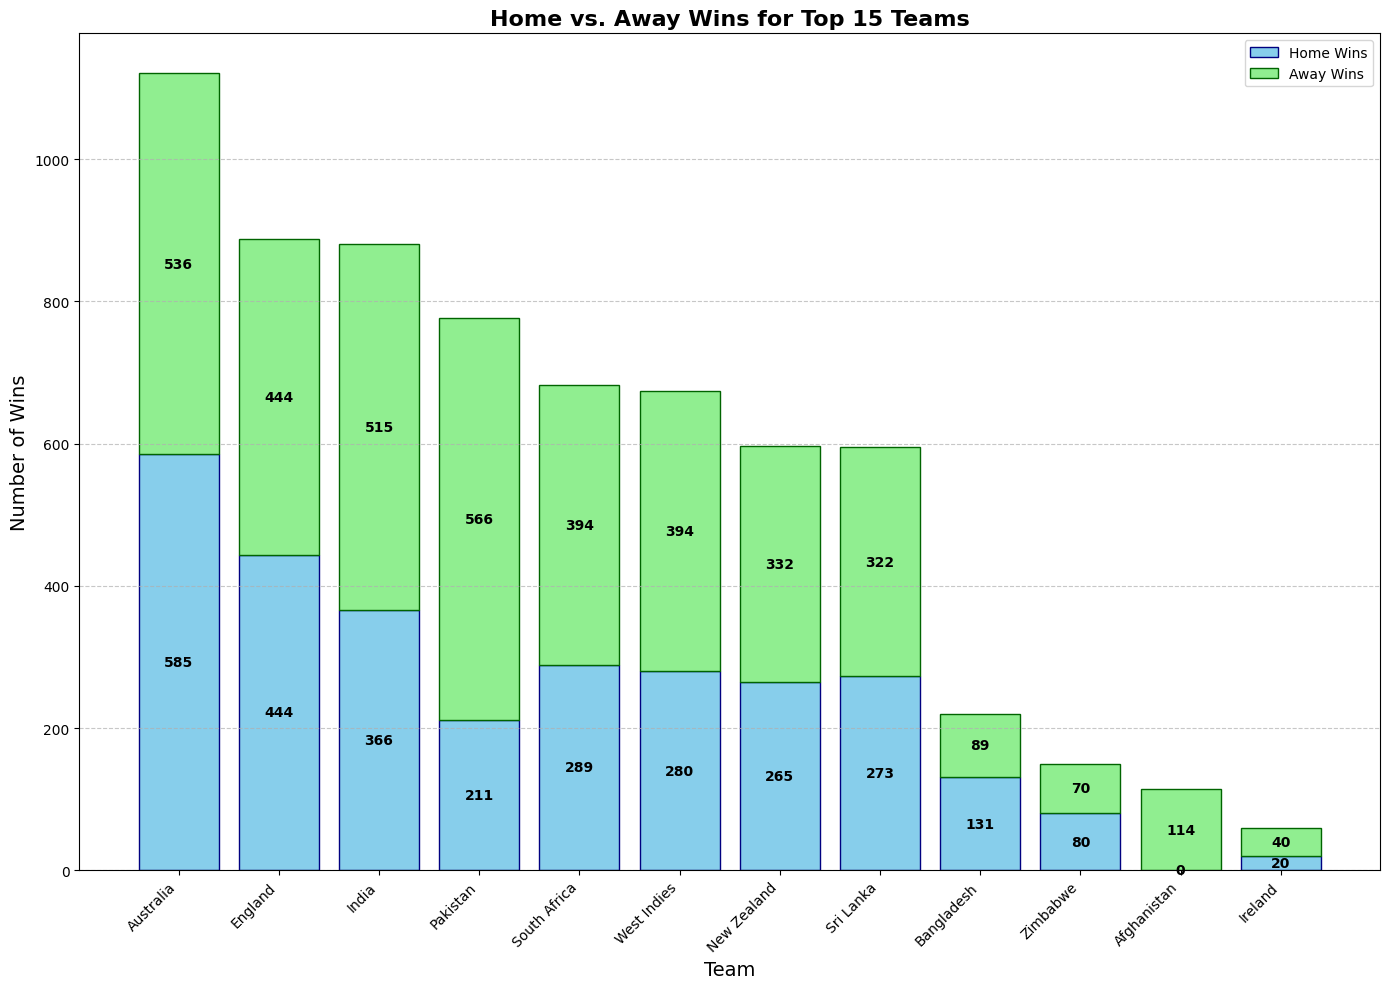

In [127]:
# Create a stacked bar chart to show home vs. away wins
plt.figure(figsize=(14, 10))

# Get top 15 teams by total wins
top15_home_away = significant_teams.head(15).copy()

# Create the stacked bar chart
bar_width = 0.8
indices = np.arange(len(top15_home_away))

# Create bars
plt.bar(indices, top15_home_away['Home_Wins'], bar_width, 
        label='Home Wins', color='skyblue', edgecolor='navy')
plt.bar(indices, top15_home_away['Away_Wins'], bar_width,
        bottom=top15_home_away['Home_Wins'], label='Away Wins', 
        color='lightgreen', edgecolor='darkgreen')

# Add team labels
plt.xticks(indices, top15_home_away['Team'], rotation=45, ha='right')

# Add win count labels
for i, (home_wins, away_wins) in enumerate(zip(top15_home_away['Home_Wins'], top15_home_away['Away_Wins'])):
    # Label for home wins
    plt.text(i, home_wins/2, f"{int(home_wins)}", ha='center', va='center', fontweight='bold')
    # Label for away wins
    plt.text(i, home_wins + away_wins/2, f"{int(away_wins)}", ha='center', va='center', fontweight='bold')

# Add chart title and labels
plt.title('Home vs. Away Wins for Top 15 Teams', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

# Add a legend
plt.legend(loc='upper right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**6. Analyze win margins to identify dominant victories:**

Now, examine the average win margins for top teams to identify those that not only win frequently but win convincingly.

In [131]:
data.head(3)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,...,5,2007,Nov,India,False,6.0,0.0,False,True,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True


In [137]:
data[data["won_by_runs"] > 0]

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,...,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns,is_home_win,is_away_win
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,...,4,2006,Jan,Pakistan,False,0.0,341.0,False,True,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,...,5,2005,Mar,India,False,0.0,168.0,False,False,True
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,...,5,2005,Mar,India,False,0.0,195.0,False,True,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,...,4,2004,Apr,Pakistan,False,0.0,131.0,False,False,True
11,Pakistan,India,India,inns & 52 runs,Multan,Test,1693,0,0,2004-03-28,...,5,2004,Mar,Pakistan,False,0.0,52.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,Test,1768,0,0,2005-10-14,...,4,2005,Oct,Australia,False,0.0,210.0,False,True,False
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),ODI,0,2284,0,2005-10-09,...,1,2005,Oct,Australia,False,0.0,156.0,False,True,False
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),ODI,0,2283,0,2005-10-07,...,1,2005,Oct,Australia,False,0.0,55.0,False,True,False
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),ODI,0,2282,0,2005-10-05,...,1,2005,Oct,Australia,False,0.0,93.0,False,True,False


In [138]:
# Calculate average win margins by team:
team_margins = data.groupby('winner').agg({
    'won_by_runs': lambda x: x[x > 0].mean(),
    'won_by_wickets': lambda x: x[x > 0].mean()
}).reset_index()
team_margins

,winner,won_by_runs,won_by_wickets
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [139]:
# Rename columns for clarity
team_margins.columns = ['Team', 'Avg_Runs_Margin', 'Avg_Wickets_Margin']
team_margins

,Team,Avg_Runs_Margin,Avg_Wickets_Margin
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [140]:
# Fill NaN values with 0 (teams that haven't won by runs or wickets)
team_margins = team_margins.fillna(0)
team_margins

,Team,Avg_Runs_Margin,Avg_Wickets_Margin
0,Afghanistan,59.309859,5.904762
1,Australia,97.908243,6.484979
2,Bangladesh,71.740741,5.787037
3,England,94.344902,6.312958
4,India,83.458050,6.219114
5,Ireland,39.350000,5.225000
6,New Zealand,71.971698,6.057471
7,Pakistan,72.697561,6.206897
8,South Africa,93.681818,6.350340
9,Sri Lanka,82.235110,6.071161


In [141]:
# Merge with win counts
team_performance = pd.merge(team_wins, team_margins, left_on='Team', right_on='Team')
team_performance

,Team,Wins,Win_Percentage,Avg_Runs_Margin,Avg_Wickets_Margin
0,Australia,1121,16.0,97.908243,6.484979
1,England,888,12.7,94.344902,6.312958
2,India,881,12.6,83.458050,6.219114
3,Pakistan,777,11.1,72.697561,6.206897
4,South Africa,683,9.8,93.681818,6.350340
5,West Indies,674,9.6,87.031746,6.554572
6,New Zealand,597,8.5,71.971698,6.057471
7,Sri Lanka,595,8.5,82.235110,6.071161
8,Bangladesh,220,3.1,71.740741,5.787037
9,no result,183,2.6,0.000000,0.000000


In [142]:
# Filter for teams with at least 20 wins for meaningful analysis
significant_performance = team_performance[team_performance['Wins'] >= 20].copy()
significant_performance

,Team,Wins,Win_Percentage,Avg_Runs_Margin,Avg_Wickets_Margin
0,Australia,1121,16.0,97.908243,6.484979
1,England,888,12.7,94.344902,6.312958
2,India,881,12.6,83.458050,6.219114
3,Pakistan,777,11.1,72.697561,6.206897
4,South Africa,683,9.8,93.681818,6.350340
5,West Indies,674,9.6,87.031746,6.554572
6,New Zealand,597,8.5,71.971698,6.057471
7,Sri Lanka,595,8.5,82.235110,6.071161
8,Bangladesh,220,3.1,71.740741,5.787037
9,no result,183,2.6,0.000000,0.000000


In [ ]:
# Display team performance metrics
print("\nTeam Performance Metrics (Teams with at least 20 wins):")
print(significant_performance[['Team', 'Wins', 'Avg_Runs_Margin', 'Avg_Wickets_Margin']].head(15))


Team Performance Metrics (Teams with at least 20 wins):
            Team  Wins  Avg_Runs_Margin  Avg_Wickets_Margin
0      Australia  1121        97.908243            6.484979
1        England   888        94.344902            6.312958
2          India   881        83.458050            6.219114
3       Pakistan   777        72.697561            6.206897
4   South Africa   683        93.681818            6.350340
5    West Indies   674        87.031746            6.554572
6    New Zealand   597        71.971698            6.057471
7      Sri Lanka   595        82.235110            6.071161
8     Bangladesh   220        71.740741            5.787037
9      no result   183         0.000000            0.000000
10      Zimbabwe   150        50.180556            5.239437
11   Afghanistan   114        59.309859            5.904762
12       Ireland    60        39.350000            5.225000
13          tied    58         0.000000            0.000000


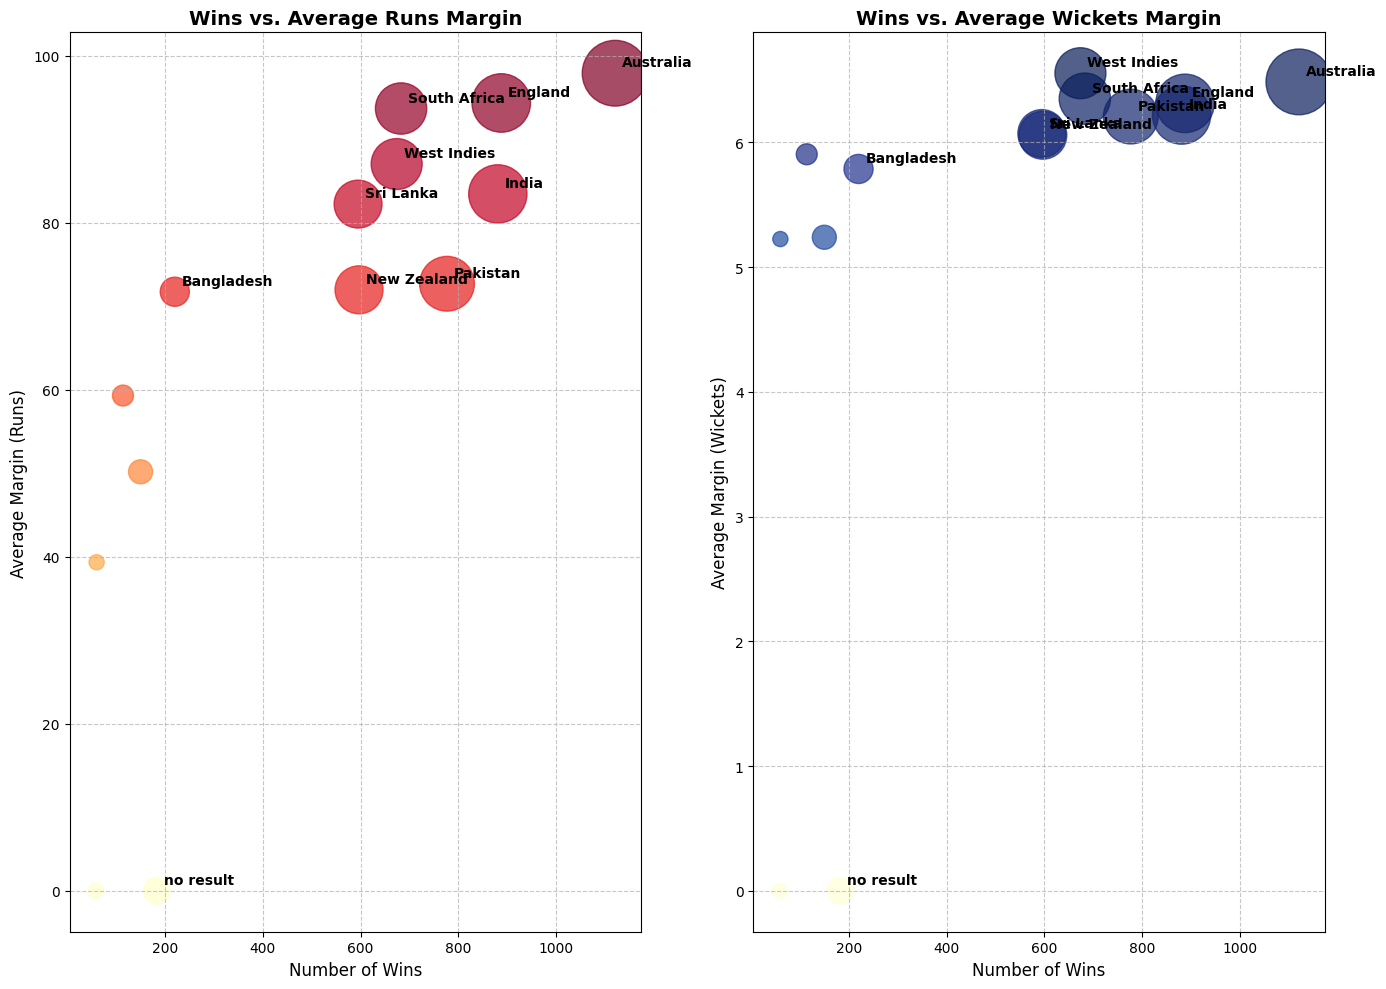

In [147]:
# Create a scatter plot to visualize the relationship between wins and margins
plt.figure(figsize=(14, 10))

# Create the scatter plot for runs margin
plt.subplot(1, 2, 1)
plt.scatter(
    significant_performance['Wins'], 
    significant_performance['Avg_Runs_Margin'],
    s=significant_performance['Wins'] * 2,  # Size proportional to wins
    alpha=0.7,
    c=significant_performance['Avg_Runs_Margin'],  # Color by margin
    cmap='YlOrRd'
)

# Add team labels for top teams
for i, row in significant_performance.nlargest(10, 'Wins').iterrows():
    plt.annotate(
        row['Team'], 
        (row['Wins'], row['Avg_Runs_Margin']),
        xytext=(5, 5),
        textcoords='offset points',
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Wins vs. Average Runs Margin', fontsize=14, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Average Margin (Runs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Create the scatter plot for wickets margin
plt.subplot(1, 2, 2)
plt.scatter(
    significant_performance['Wins'], 
    significant_performance['Avg_Wickets_Margin'],
    s=significant_performance['Wins'] * 2,  # Size proportional to wins
    alpha=0.7,
    c=significant_performance['Avg_Wickets_Margin'],  # Color by margin
    cmap='YlGnBu'
)

# Add team labels for top teams
for i, row in significant_performance.nlargest(10, 'Wins').iterrows():
    plt.annotate(
        row['Team'], 
        (row['Wins'], row['Avg_Wickets_Margin']),
        xytext=(5, 5),
        textcoords='offset points',
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Wins vs. Average Wickets Margin', fontsize=14, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Average Margin (Wickets)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**7. Identify underdog teams with potential:**

Let's identify teams that might be underdogs but show potential for growth based on recent performance trends.

In [148]:
# Calculate recent performance (last 5 years)
max_year = data['year'].max()
recent_data = data[data['year'] >= max_year - 5]

# Count recent wins
recent_wins = recent_data['winner'].value_counts().reset_index()
recent_wins.columns = ['Team', 'Recent_Wins']

# Calculate total matches in recent period
recent_total = len(recent_data)

# Calculate recent win percentage
recent_wins['Recent_Win_Percentage'] = (recent_wins['Recent_Wins'] / recent_total * 100).round(1)

# Merge with overall performance
team_trends = pd.merge(team_wins, recent_wins, on='Team', how='left')

# Fill NaN values with 0 (teams with no recent wins)
team_trends['Recent_Wins'] = team_trends['Recent_Wins'].fillna(0)
team_trends['Recent_Win_Percentage'] = team_trends['Recent_Win_Percentage'].fillna(0)

# Calculate improvement ratio (recent win % / overall win %)
team_trends['Improvement_Ratio'] = (team_trends['Recent_Win_Percentage'] / team_trends['Win_Percentage']).round(2)

# Filter for teams with at least 5 wins overall
potential_teams = team_trends[team_trends['Wins'] >= 5].copy()

# Sort by improvement ratio to identify rising teams
potential_teams = potential_teams.sort_values('Improvement_Ratio', ascending=False)

In [149]:
# Display teams with highest improvement ratios
print("\nTeams with Highest Improvement Ratios (Recent vs Overall Performance):")
print(potential_teams[['Team', 'Wins', 'Win_Percentage', 'Recent_Wins', 
                      'Recent_Win_Percentage', 'Improvement_Ratio']].head(10))


Teams with Highest Improvement Ratios (Recent vs Overall Performance):
            Team  Wins  Win_Percentage  Recent_Wins  Recent_Win_Percentage  \
12       Ireland    60             0.9         29.0                    2.8   
11   Afghanistan   114             1.6         50.0                    4.8   
8     Bangladesh   220             3.1         76.0                    7.4   
9      no result   183             2.6         37.0                    3.6   
10      Zimbabwe   150             2.1         28.0                    2.7   
13          tied    58             0.8         10.0                    1.0   
2          India   881            12.6        158.0                   15.3   
6    New Zealand   597             8.5        104.0                   10.1   
7      Sri Lanka   595             8.5         79.0                    7.7   
4   South Africa   683             9.8         89.0                    8.6   

    Improvement_Ratio  
12               3.11  
11               3.00

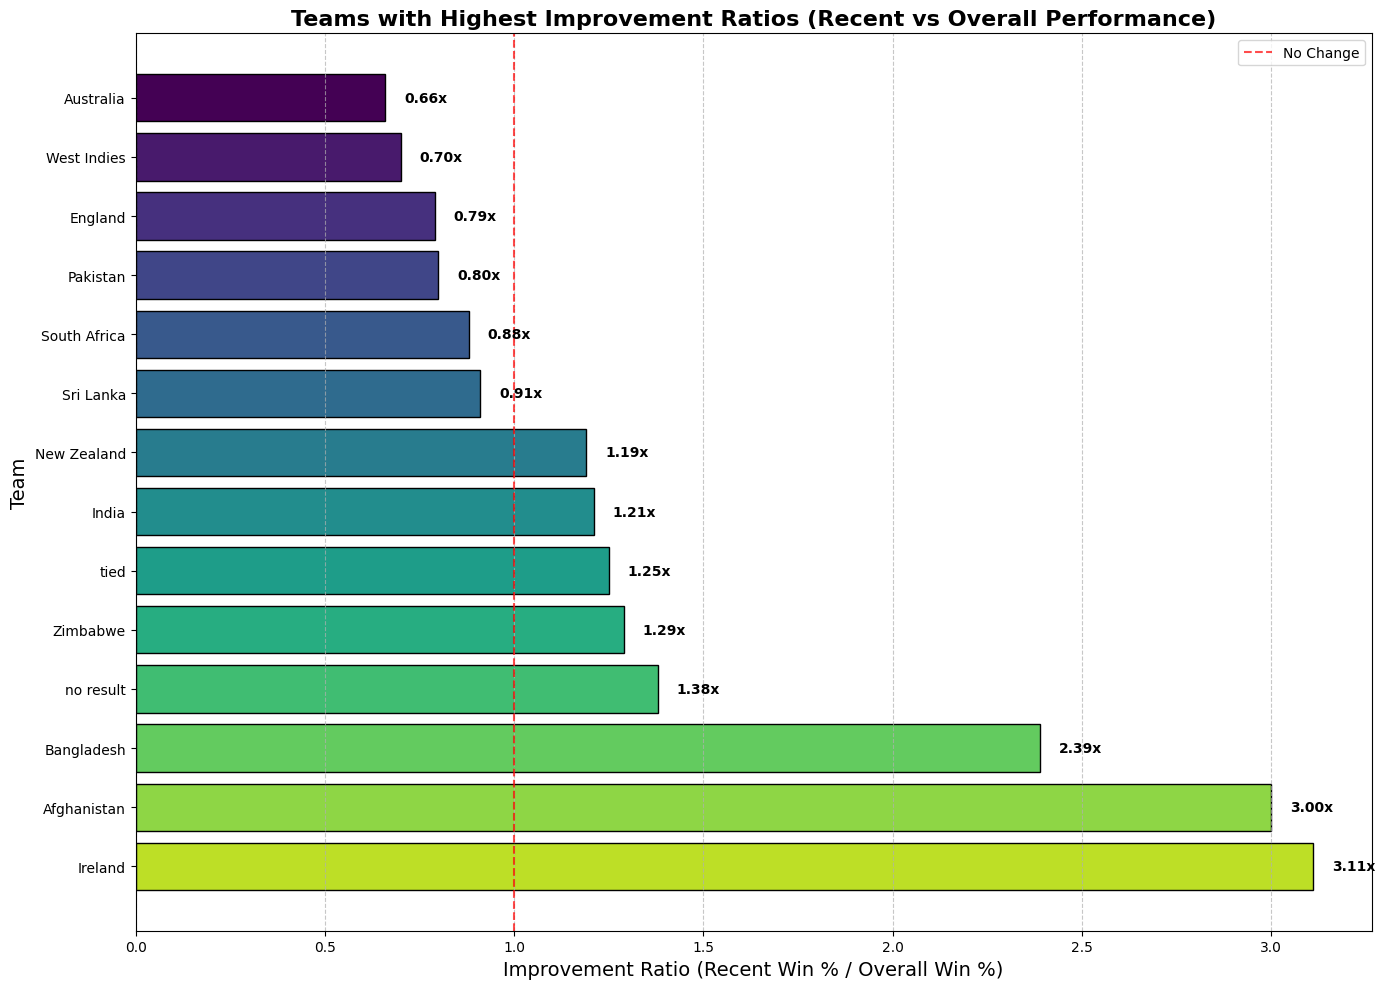

In [150]:
# Create a horizontal bar chart to visualize improvement ratios
plt.figure(figsize=(14, 10))

# Get top 15 teams by improvement ratio
top_improvers = potential_teams.head(15).copy()

# Create horizontal bars
bars = plt.barh(
    top_improvers['Team'], 
    top_improvers['Improvement_Ratio'],
    color=plt.cm.viridis(np.linspace(0.9, 0, len(top_improvers))),  # Reverse color gradient
    edgecolor='black',
    linewidth=1
)

# Add ratio labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.05, 
        bar.get_y() + bar.get_height()/2, 
        f'{width:.2f}x',
        va='center', 
        fontweight='bold'
    )

# Add a vertical line at ratio = 1.0 (no improvement)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='No Change')

# Add chart title and labels
plt.title('Teams with Highest Improvement Ratios (Recent vs Overall Performance)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Improvement Ratio (Recent Win % / Overall Win %)', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**8.  Visualization of team dominance:**

Now, create a comprehensive visualization that combines `win counts`, `win percentages`, and `recent performance` to provide a complete picture of team dominance.

In [154]:
# Prepare data for the comprehensive visualization
top15_teams = team_trends.nlargest(15, 'Wins').copy()
top15_teams

,Team,Wins,Win_Percentage,Recent_Wins,Recent_Win_Percentage,Improvement_Ratio
0,Australia,1121,16.0,108.0,10.5,0.66
1,England,888,12.7,103.0,10.0,0.79
2,India,881,12.6,158.0,15.3,1.21
3,Pakistan,777,11.1,92.0,8.9,0.80
4,South Africa,683,9.8,89.0,8.6,0.88
5,West Indies,674,9.6,69.0,6.7,0.70
6,New Zealand,597,8.5,104.0,10.1,1.19
7,Sri Lanka,595,8.5,79.0,7.7,0.91
8,Bangladesh,220,3.1,76.0,7.4,2.39
9,no result,183,2.6,37.0,3.6,1.38


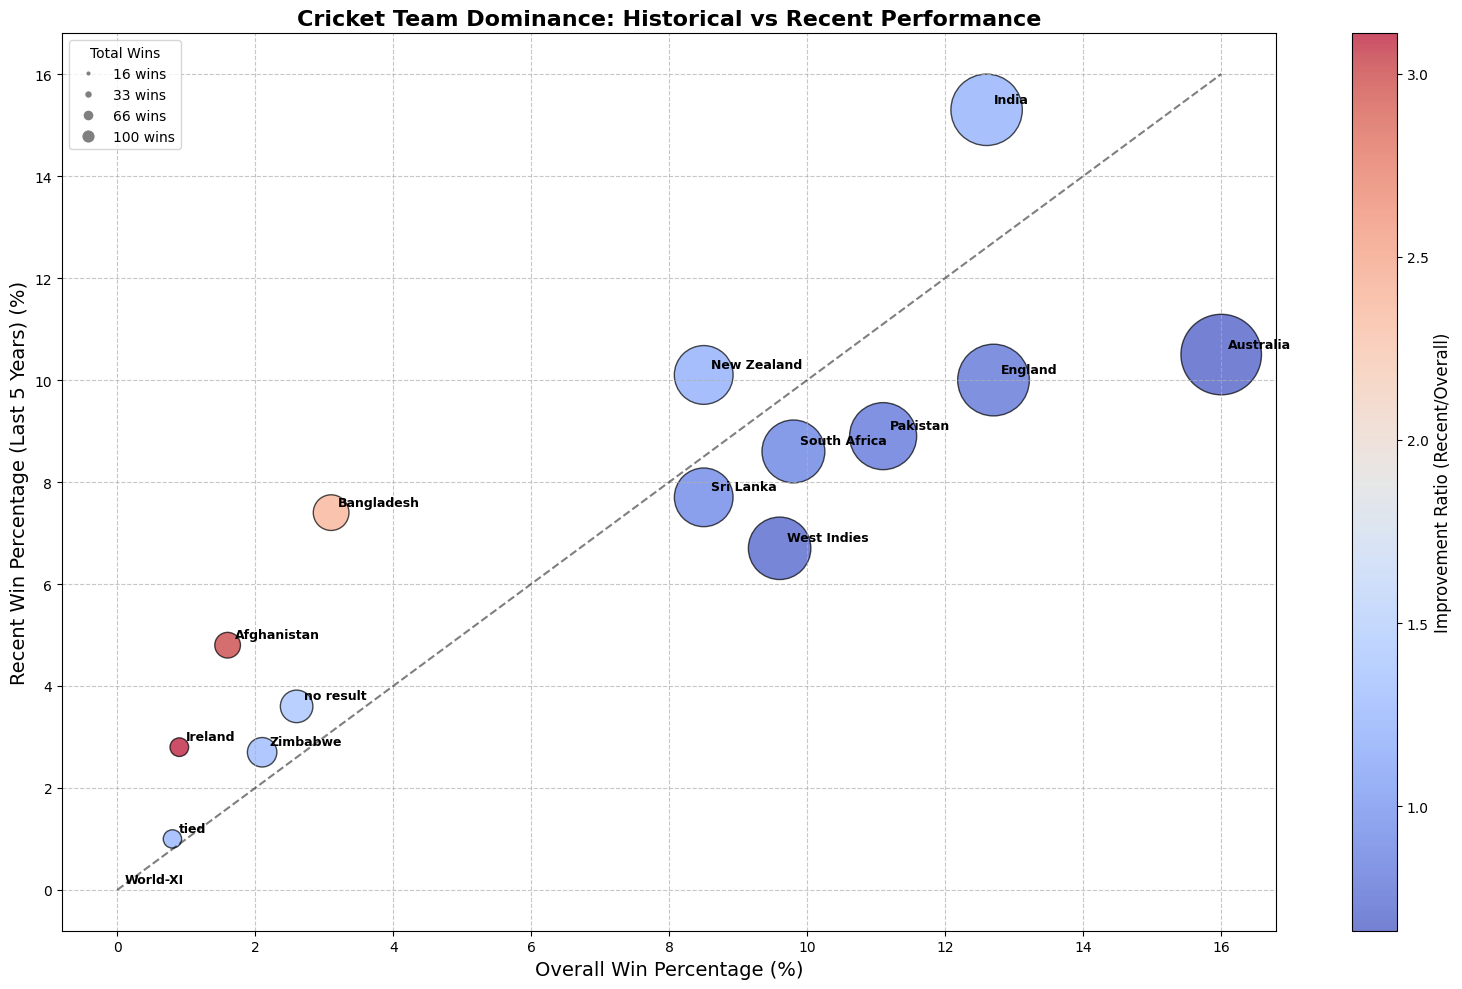

In [155]:
# Create a figure:
plt.figure(figsize=(16, 10))

# Create a scatter plot with multiple dimensions of information
scatter = plt.scatter(
    top15_teams['Win_Percentage'],  # x-axis: overall win percentage
    top15_teams['Recent_Win_Percentage'],  # y-axis: recent win percentage
    s=top15_teams['Wins'] * 3,  # size: total wins
    c=top15_teams['Improvement_Ratio'],  # color: improvement ratio
    cmap='coolwarm',  # colormap: blue for declining, red for improving
    alpha=0.7,
    edgecolors='black'
)

# Add a diagonal line representing equal performance (recent = overall)
max_val = max(top15_teams['Win_Percentage'].max(), top15_teams['Recent_Win_Percentage'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Equal Performance')

# Add team labels
for i, row in top15_teams.iterrows():
    plt.annotate(
        row['Team'], 
        (row['Win_Percentage'], row['Recent_Win_Percentage']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

# Add chart title and labels
plt.title('Cricket Team Dominance: Historical vs Recent Performance', fontsize=16, fontweight='bold')
plt.xlabel('Overall Win Percentage (%)', fontsize=14)
plt.ylabel('Recent Win Percentage (Last 5 Years) (%)', fontsize=14)

# Add a colorbar to explain the color coding
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement Ratio (Recent/Overall)', fontsize=12)

# Add a legend to explain the bubble size
# Create a dummy scatter plot for the legend
sizes = [50, 100, 200, 300]
win_counts = [50/3, 100/3, 200/3, 300/3]  # Reverse the scaling for the legend
labels = [f"{int(count)} wins" for count in win_counts]

# Create legend elements
legend_elements = []
for size, label in zip(sizes, labels):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                          label=label, markerfacecolor='gray', 
                          markersize=np.sqrt(size/np.pi)))

# Add the legend
plt.legend(handles=legend_elements, title="Total Wins", loc="upper left")

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the chart
plt.show()

**9. Draw conclusions and provide recommendations:**

In [161]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns',
       'is_home_win', 'is_away_win'],
      dtype='object')

In [ ]:
# Identify key insights from the analysis: top 3 dominant teams:
dominant_teams = team_wins.head(3)['Team'].tolist()
dominant_teams

['Australia', 'England', 'India']

In [ ]:
# Top 3 rising teams:
rising_teams = potential_teams[potential_teams['Improvement_Ratio'] > 1.5].head(3)['Team'].tolist()
rising_teams

['Ireland', 'Afghanistan', 'Bangladesh']

In [162]:
# Underperforming traditional powers:
underperforming_teams = team_trends[
    (team_trends['Wins'] >= 20) & 
    (team_trends['Improvement_Ratio'] < 0.8)
]['Team'].tolist()
underperforming_teams

['Australia', 'England', 'West Indies']

In [168]:
# Calculate the concentration of wins
top3_win_percentage = team_wins.head(3)['Wins'].sum() / total_matches * 100
top5_win_percentage = team_wins.head(5)['Wins'].sum() / total_matches * 100
bottom_half_win_percentage = team_wins.iloc[len(team_wins)//2:]['Wins'].sum() / total_matches * 100

# Print conclusions
print("\nConclusions on Team Dominance:")
print(f"1. Historical Dominance: {', '.join(dominant_teams)} have been the most \n successful teams, " 
      f"collectively winning {top3_win_percentage:.1f}% of all matches.\n")
print(f"2. Concentration of Success: The top 5 teams account for {top5_win_percentage:.1f}% \n of all wins, " 
      f"while the bottom half of teams account for only {bottom_half_win_percentage:.1f}%.\n")
print(f"3. Rising Teams: {', '.join(rising_teams)} show significant improvement \n in recent years, " 
      f"with win percentages at least 1.5 times their historical average.\n")
print(f"4. Underperforming Traditional Powers: {', '.join(underperforming_teams[:3])} \n"
      f" have seen declining performance in recent years.")


Conclusions on Team Dominance:
1. Historical Dominance: Australia, England, India have been the most 
 successful teams, collectively winning 41.3% of all matches.

2. Concentration of Success: The top 5 teams account for 62.1% 
 of all wins, while the bottom half of teams account for only 19.7%.

3. Rising Teams: Ireland, Afghanistan, Bangladesh show significant improvement 
 in recent years, with win percentages at least 1.5 times their historical average.

4. Underperforming Traditional Powers: Australia, England, West Indies 
 have seen declining performance in recent years.


In [169]:
# Format-specific insights
format_dominance = format_pivot.idxmax().to_dict()
format_insights = []
for fmt, team in format_dominance.items():
    win_pct = format_pivot.loc[team, fmt]
    format_insights.append(f"{team} dominates {fmt} cricket with a {win_pct:.1f}% win rate")

print("\nFormat-specific insights:")
for insight in format_insights:
    print(f"- {insight}")


Format-specific insights:
- Australia dominates ODI  cricket with a 14.5% win rate
- India dominates T20I  cricket with a 14.5% win rate
- Australia dominates Test  cricket with a 23.4% win rate


In [173]:
# Print recommendations
print("\nRecommendations for Strengthening Underdogs and Grassroots Development:")
print("1. Targeted Investment: Allocate development funds to rising teams like \n" 
      f"{', '.join(rising_teams)} to capitalize on their momentum.\n")
print("2. Competitive Balance Initiatives: Implement revenue sharing and resource\n allocation models " 
      "that reduce the gap between dominant and emerging teams.\n")
print("3. Format-Specific Development: Create specialized development programs for\n formats where " 
      "teams are underperforming to build balanced capabilities.\n")
print("4. Talent Exchange Programs: Establish coaching and player exchange programs \nbetween dominant " 
      "and developing teams to transfer knowledge and skills.\n")
print("5. Grassroots Infrastructure: Invest in cricket infrastructure in regions \nwith emerging teams " 
      "to build sustainable talent pipelines.\n")
print("6. Tournament Structure Reform: Design tournament structures that provide more \ncompetitive " 
      "opportunities for developing teams while maintaining elite competition.\n")
print("7. Performance Monitoring System: Implement a comprehensive performance \ntracking system to " 
      "identify early signs of improvement in \ndeveloping teams and provide timely support.\n")


Recommendations for Strengthening Underdogs and Grassroots Development:
1. Targeted Investment: Allocate development funds to rising teams like 
Ireland, Afghanistan, Bangladesh to capitalize on their momentum.

2. Competitive Balance Initiatives: Implement revenue sharing and resource
 allocation models that reduce the gap between dominant and emerging teams.

3. Format-Specific Development: Create specialized development programs for
 formats where teams are underperforming to build balanced capabilities.

4. Talent Exchange Programs: Establish coaching and player exchange programs 
between dominant and developing teams to transfer knowledge and skills.

5. Grassroots Infrastructure: Invest in cricket infrastructure in regions 
with emerging teams to build sustainable talent pipelines.

6. Tournament Structure Reform: Design tournament structures that provide more 
competitive opportunities for developing teams while maintaining elite competition.

7. Performance Monitoring System: 